# Import Libraires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data

In [2]:
data = pd.read_csv(r"C:\Users\yaksh\OneDrive\Desktop\programing\ML\ML data\Dataset_master.xlsx - Instagram Ads Kernel SVM.csv")
data.head()

,Age,Mobile Phone,Purchased
0,15,6334,0
1,28,6667,0
2,20,14334,0
3,21,19000,0
4,15,25334,0


In [3]:
X=data.iloc[:,0:2].values
Y=data.iloc[:,-1:].values

# Spliting data

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)


# Scaling the Data

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# ML Algorithm

In [6]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,Y_train)

C:\Users\yaksh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

# Prediction

In [7]:
print(classifier.predict(sc.transform([[25,55000]])))

[1]


In [8]:
a=classifier.predict(X_test)
a=a.reshape(len(a),1)
b=Y_test.reshape(len(Y_test),1)
print(np.concatenate((b,a),1))

[[0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]]


In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(b,a))
cm=confusion_matrix(b,a)
cm

0.9


array([[36,  4],
       [ 2, 18]], dtype=int64)

Text(50.722222222222214, 0.5, 'predicted')

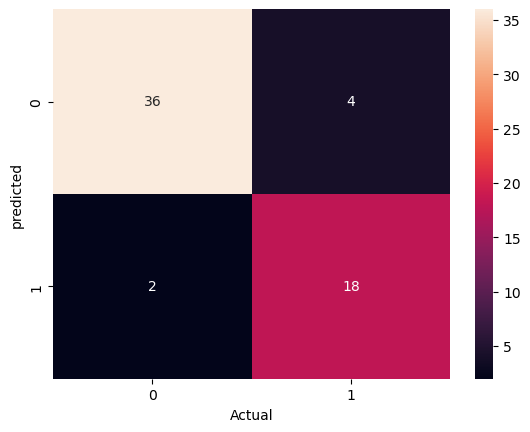

In [13]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel('Actual')
plt.ylabel('predicted')

In [177]:
df=pd.read_csv(r"C:\Users\yaksh\OneDrive\Desktop\programing\ML\kaggle data\Titanic Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [178]:
df1=df.drop(['Survived','PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)
target=pd.DataFrame(df['Survived'])

In [179]:
df1.columns[df1.isna().any()]

Index(['Age', 'Fare'], dtype='object')

In [180]:
df1.isna().any()

Pclass    False
Sex       False
Age        True
Fare       True
dtype: bool

In [181]:
mean=df1['Age'].mean()
mean2=df1['Fare'].mean()
df1['Age']=df1['Age'].fillna(mean)
df1['Fare']=df1['Fare'].fillna(mean2)

In [182]:
df1.isna().any()

Pclass    False
Sex       False
Age       False
Fare      False
dtype: bool

In [183]:
df1.head()

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875


In [184]:
target.head()
X=df1.iloc[:,:].values
y=target.iloc[:,:].values

In [185]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoding',OneHotEncoder(),[1])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [186]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [187]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

C:\Users\yaksh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [188]:
y_pred = classifier.predict(X_test)

In [189]:
classifier.score(X_test,y_test)

1.0

In [190]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
cm

array([[85,  0],
       [ 0, 41]], dtype=int64)